<a href="https://colab.research.google.com/github/Melania-77/health_economics_challenge/blob/main/Comp_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import files
import pandas as pd

# Subir el archivo desde tu computadora
uploaded = files.upload()

# Leer el Excel (ajustá el nombre al que se suba)
df = pd.read_excel("comparaciones de modelos.xlsx")

# Ver las primeras filas
df.head()

Saving comparaciones de modelos.xlsx to comparaciones de modelos (1).xlsx


,Country Name,Country Code,year,Modelo 1,Modelo 2,Modelo 3,Real
0,Afghanistan,AFG,2021,222.71,171.89,210.28,298.62
1,Argentina,ARG,2021,530.28,563.37,546.73,703.43
2,Brazil,BRA,2021,428.54,424.16,403.27,464.28
3,China,CHN,2021,356.55,386.15,341.84,381.44
4,Germany,DEU,2021,861.54,862.81,868.49,907.53


RMSE:
Modelo 1: 285.7756271668539
Modelo 2: 278.8604705021772
Modelo 3: 279.53627323153233

MAE:
Modelo 1: 106.87608695652175
Modelo 2: 113.29999999999998
Modelo 3: 112.33999999999999


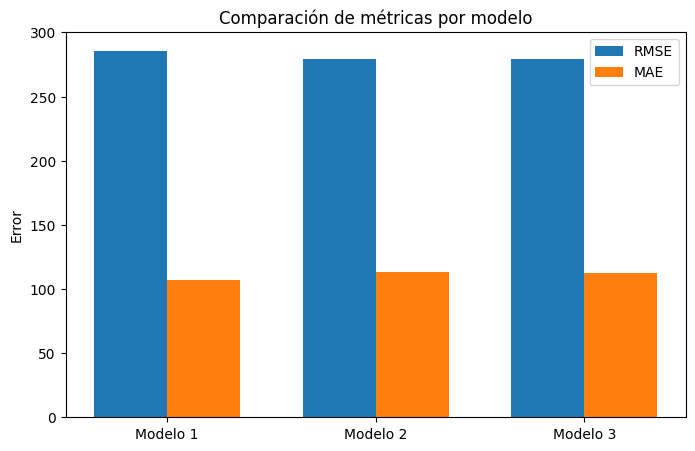

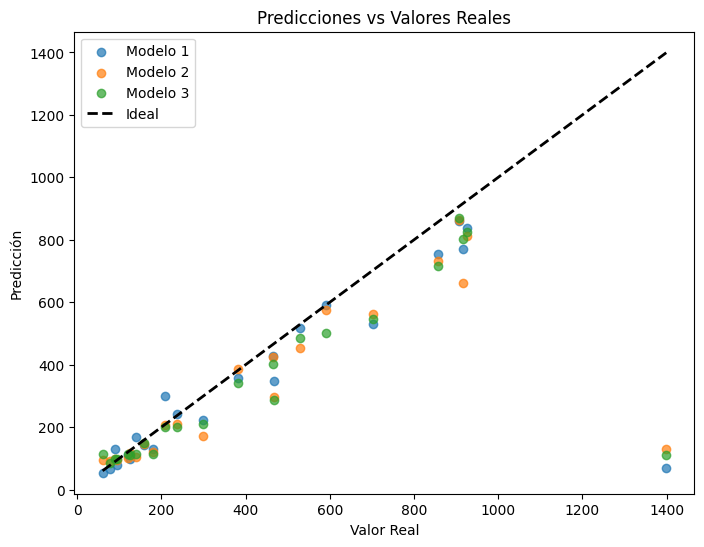

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Leer el archivo cargado
df = pd.read_excel("comparaciones de modelos.xlsx")

# Extraer columnas de interés
y_true = df["Real"]
y_m1 = df["Modelo 1"]
y_m2 = df["Modelo 2"]
y_m3 = df["Modelo 3"]

# Calcular métricas
rmse_m1 = np.sqrt(mean_squared_error(y_true, y_m1))
rmse_m2 = np.sqrt(mean_squared_error(y_true, y_m2))
rmse_m3 = np.sqrt(mean_squared_error(y_true, y_m3))

mae_m1 = mean_absolute_error(y_true, y_m1)
mae_m2 = mean_absolute_error(y_true, y_m2)
mae_m3 = mean_absolute_error(y_true, y_m3)

print("RMSE:")
print("Modelo 1:", rmse_m1)
print("Modelo 2:", rmse_m2)
print("Modelo 3:", rmse_m3)

print("\nMAE:")
print("Modelo 1:", mae_m1)
print("Modelo 2:", mae_m2)
print("Modelo 3:", mae_m3)

# Gráfico de barras comparando errores
labels = ["Modelo 1", "Modelo 2", "Modelo 3"]
rmse_values = [rmse_m1, rmse_m2, rmse_m3]
mae_values = [mae_m1, mae_m2, mae_m3]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width/2, rmse_values, width, label='RMSE')
rects2 = ax.bar(x + width/2, mae_values, width, label='MAE')

ax.set_ylabel('Error')
ax.set_title('Comparación de métricas por modelo')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

# Gráfico de dispersión: predicciones vs valores reales
plt.figure(figsize=(8,6))
plt.scatter(y_true, y_m1, label="Modelo 1", alpha=0.7)
plt.scatter(y_true, y_m2, label="Modelo 2", alpha=0.7)
plt.scatter(y_true, y_m3, label="Modelo 3", alpha=0.7)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2, label="Ideal")
plt.xlabel("Valor Real")
plt.ylabel("Predicción")
plt.title("Predicciones vs Valores Reales")
plt.legend()
plt.show()

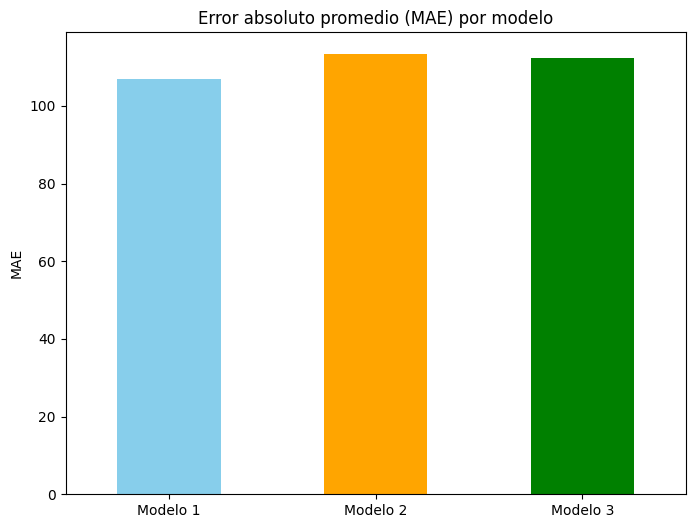

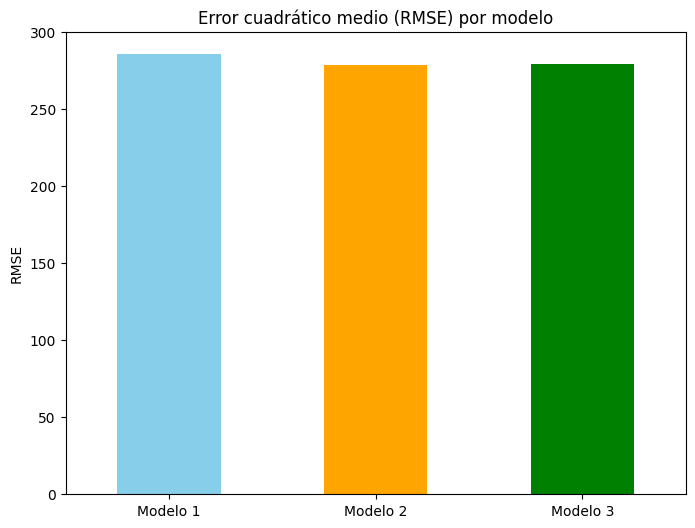

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Cargar el archivo subido (queda en /content/)
df = pd.read_excel('/content/comparaciones de modelos.xlsx')

# 2. Calcular errores por modelo
errors = {}
for model in ['Modelo 1','Modelo 2','Modelo 3']:
    mae = np.mean(np.abs(df['Real'] - df[model]))
    rmse = np.sqrt(np.mean((df['Real'] - df[model])**2))
    errors[model] = {'MAE': mae, 'RMSE': rmse}

# 3. Convertir a DataFrame
errors_df = pd.DataFrame(errors).T

# 4. Gráfico de barras: MAE
plt.figure(figsize=(8,6))
errors_df['MAE'].plot(kind='bar', color=['skyblue','orange','green'])
plt.title('Error absoluto promedio (MAE) por modelo')
plt.ylabel('MAE')
plt.xticks(rotation=0)
plt.show()

# 5. Gráfico de barras: RMSE
plt.figure(figsize=(8,6))
errors_df['RMSE'].plot(kind='bar', color=['skyblue','orange','green'])
plt.title('Error cuadrático medio (RMSE) por modelo')
plt.ylabel('RMSE')
plt.xticks(rotation=0)
plt.show()

Carga y escalado de datos

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

# Cargar el Excel (subido en /content/)
df = pd.read_excel('/content/comparaciones de modelos.xlsx')

# Selección de variables para el análisis
features = ['Real', 'Modelo 1', 'Modelo 2', 'Modelo 3']

# Escalado (estandarización: media=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

df_scaled = pd.DataFrame(X_scaled, columns=features)
df_scaled['Country Name'] = df['Country Name']

# Vista rápida
df_scaled.head()

,Real,Modelo 1,Modelo 2,Modelo 3,Country Name
0,-0.371867,-0.442573,-0.600402,-0.445324,Afghanistan
1,0.758568,0.722640,0.945909,0.851957,Argentina
2,0.090739,0.337203,0.396042,0.298805,Brazil
3,-0.140592,0.064473,0.245906,0.061944,China
4,1.328518,1.977601,2.128670,2.092596,Germany


Clustering con K-means y visualización básica

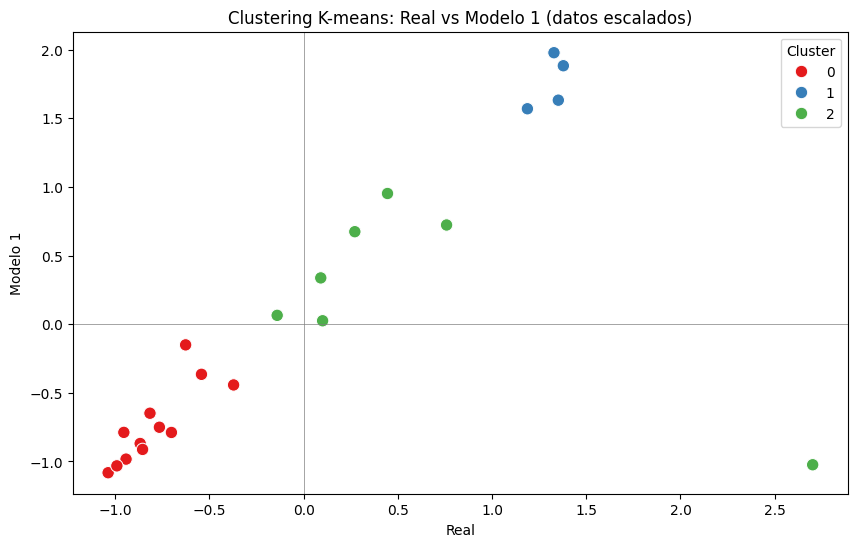

,Country Name
Cluster,
0,"[Afghanistan, Guinea-Bissau, India, Kenya, Lib..."
1,"[Germany, Spain, United Kingdom, Sweden]"
2,"[Argentina, Brazil, China, Japan, Korea, Rep.,..."


In [21]:
from sklearn.cluster import KMeans

# Elegir número de clusters (k). Puedes ajustar k según tu criterio o con el método del codo
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled[features])

# Visualización: Real vs Modelo 1 (escalados), coloreado por cluster
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_scaled, x='Real', y='Modelo 1', hue='Cluster', palette='Set1', s=80)
plt.title('Clustering K-means: Real vs Modelo 1 (datos escalados)')
plt.axhline(0, color='grey', lw=0.5); plt.axvline(0, color='grey', lw=0.5)
plt.show()

# Lista de países por cluster (útil para el informe)
clusters_list = df_scaled.groupby('Cluster')['Country Name'].apply(list)
clusters_list

Número óptimo de clusters (inercia para distintos k y “método del codo)

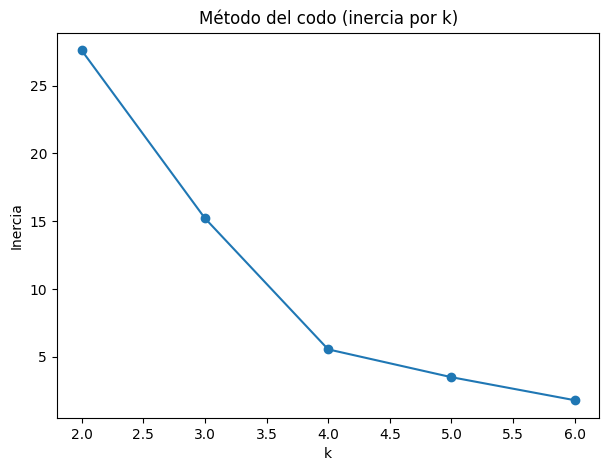

In [22]:
inertias = []
for k_test in range(2, 7):
    km = KMeans(n_clusters=k_test, random_state=42, n_init='auto').fit(df_scaled[features])
    inertias.append(km.inertia_)

plt.figure(figsize=(7,5))
plt.plot(range(2,7), inertias, marker='o')
plt.title('Método del codo (inercia por k)')
plt.xlabel('k')
plt.ylabel('Inercia')
plt.show()

PCA en 2D para visualizar la estructura y la dispersión


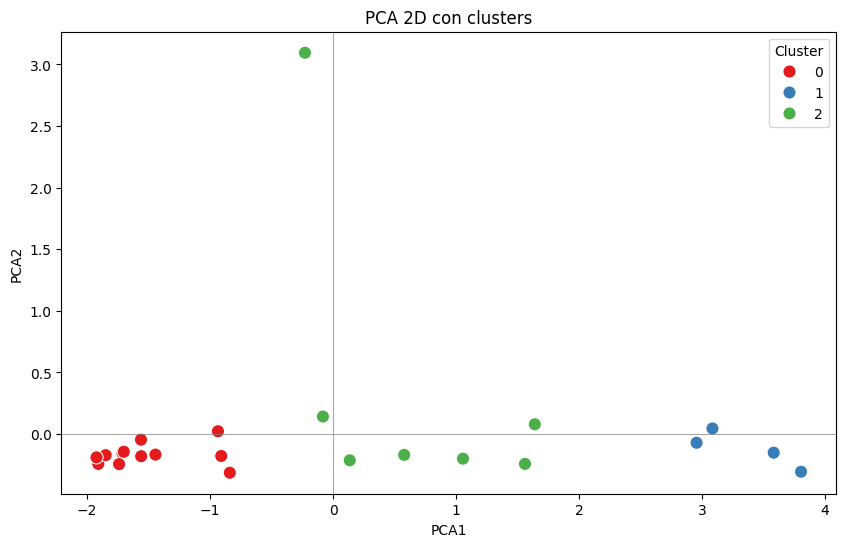

Varianza explicada: PCA1=88.27%, PCA2=11.22%, Total=99.49%


In [23]:
from sklearn.decomposition import PCA

# PCA 2 componentes
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(df_scaled[features])

df_scaled['PCA1'] = pca_result[:, 0]
df_scaled['PCA2'] = pca_result[:, 1]

# Visualización PCA con colores de cluster
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_scaled, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=90)
plt.title('PCA 2D con clusters')
plt.axhline(0, color='grey', lw=0.5); plt.axvline(0, color='grey', lw=0.5)
plt.show()

# Varianza explicada por componente (para el informe)
explained = pca.explained_variance_ratio_
print(f'Varianza explicada: PCA1={explained[0]:.2%}, PCA2={explained[1]:.2%}, Total={explained.sum():.2%}')

Regresiones lineales: pendiente y R² por modelo

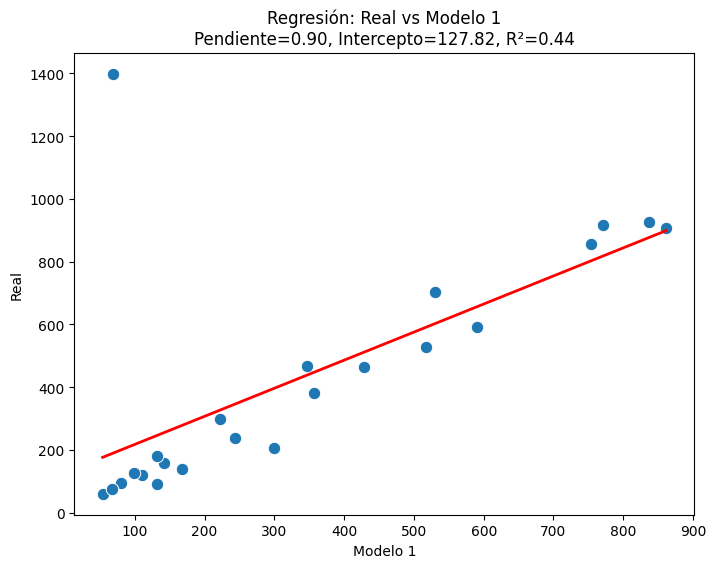

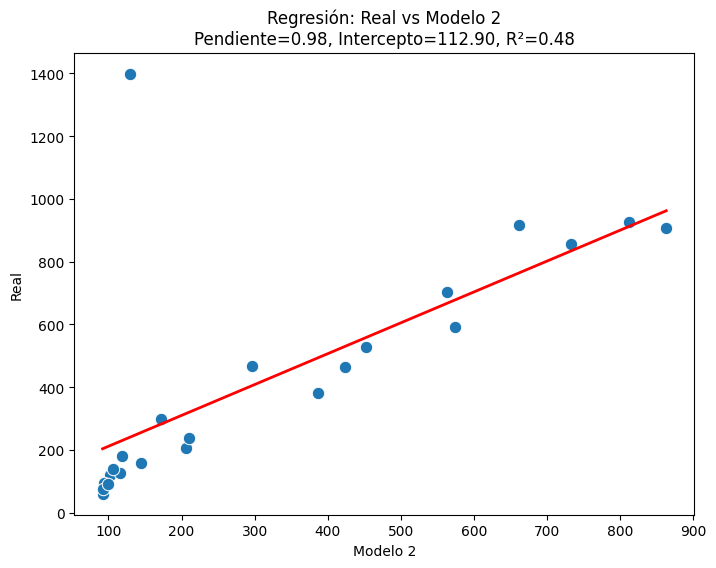

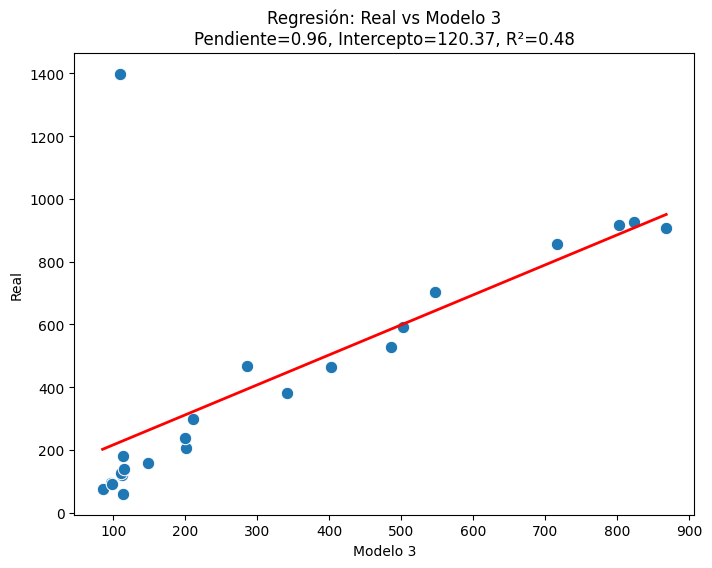

,Modelo,Pendiente,Intercepto,R2
0,Modelo 1,0.895260,127.816804,0.435476
1,Modelo 2,0.984545,112.898037,0.484490
2,Modelo 3,0.955932,120.367449,0.479309


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

resultados_reg = []

for model in ['Modelo 1','Modelo 2','Modelo 3']:
    X = df[[model]].values
    y = df['Real'].values

    reg = LinearRegression().fit(X, y)
    y_pred = reg.predict(X)
    r2 = r2_score(y, y_pred)
    pendiente = reg.coef_[0]
    intercepto = reg.intercept_

    resultados_reg.append({'Modelo': model, 'Pendiente': pendiente, 'Intercepto': intercepto, 'R2': r2})

    # Plot con línea de ajuste
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=X.squeeze(), y=y, s=80)
    x_line = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
    y_line = reg.predict(x_line)
    plt.plot(x_line, y_line, color='red', lw=2)
    plt.title(f'Regresión: Real vs {model}\nPendiente={pendiente:.2f}, Intercepto={intercepto:.2f}, R²={r2:.2f}')
    plt.xlabel(model); plt.ylabel('Real')
    plt.show()

pd.DataFrame(resultados_reg)